# Notebook - Visualizations on the network - PART- III

# Data is read and the some transformations are done for easy disections of the dataset for analysis

In [2]:
library(maps)
library(geosphere)
library(igraph)

data = readRDS('/Users/gautamborgohain/Google Drive/Social Media Analytics/modData4.rds')

names(data)[names(data) %in% c('lat','long','lat1','long1')] = c('From_lat','From_lon','To_lat','To_lon')

data$ISPAID = 1
data[data$Trans_Value %in% c('Signed','Free','Trainee','Transfer','Youth',' ','Nominal','NA','Swap',
                                              'Dead','Unknown'),]$ISPAID = 0
data[is.na(data$Trans_Value),]$ISPAID = 0

data[,c('From_League','To_League')] = "Other"
data[data$From_Nat %in% c('United Kingdom'),]$From_League = 'UK'
data[data$From_Nat %in% c('Germany'),]$From_League = 'Germany'
data[data$From_Nat %in% c('Spain'),]$From_League = 'Spain'
data[data$From_Nat %in% c('Italy'),]$From_League = 'Italy'
data[data$From_Nat %in% c('France'),]$From_League = 'France'

data[data$To_Nat %in% c('United Kingdom'),]$To_League = 'UK'
data[data$To_Nat %in% c('Germany'),]$To_League = 'Germany'
data[data$To_Nat %in% c('Spain'),]$To_League = 'Spain'
data[data$To_Nat %in% c('Italy'),]$To_League = 'Italy'
data[data$To_Nat %in% c('France'),]$To_League = 'France'

data['ID'] = 1:nrow(data)


 # maps v3.1: updated 'world': all lakes moved to separate new #
 # 'lakes' database. Type '?world' or 'news(package="maps")'.  #


Loading required package: sp

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [3]:
data[data$From_Club == 'Espanyol',]$From_lat = 41.348
data[data$From_Club == 'Espanyol',]$From_lon = 2.07
data[data$To_Club == 'Espanyol',]$To_lat = 41.348
data[data$To_Club == 'Espanyol',]$To_lon = 2.07

In [4]:
data$From_lon = as.numeric(as.character(data$From_lon))


# Transfer Between leagues

In [5]:
plotnetworksLEAGUES = function(df){
    #Nodes -  Just the league names are required here
    nodes = unique(c(temp$From_League,temp$To_League))
    #Edges
    edge = subset(df,select = c('From_League','To_League'))
    #iGraph prepare
    colors = adjustcolor(c("blue","green","red","yellow","orange","gray"), alpha.f = .5)
    g = graph.data.frame(edge,nodes,directed= T)
    g = simplify(g, remove.multiple = T, remove.loops = F)
    V(g)$color = colors
    n = nrow(nodes)    

    E(g)$arrow.size <- 1
    E(g)$width  = degree(g)
    
    V(g)$size = degree(g)*10
    #Plot
    plot(g,
         vertex.label.dist=1.5,
         vertex.label = NA,
         layout = layout.circle,
         edge.color = 'black',
        vertex.label.family = "sans")
    
    legend(x=-1.6, y=-0.83,legend = names(V(g)),colors,pt.cex=2, cex=.9,ncol = 1,
      title="European Leagues")
    
    title('Transfer Flows in Leagues')
}


## EPL has the highest inflow of foreighners

Warning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement length

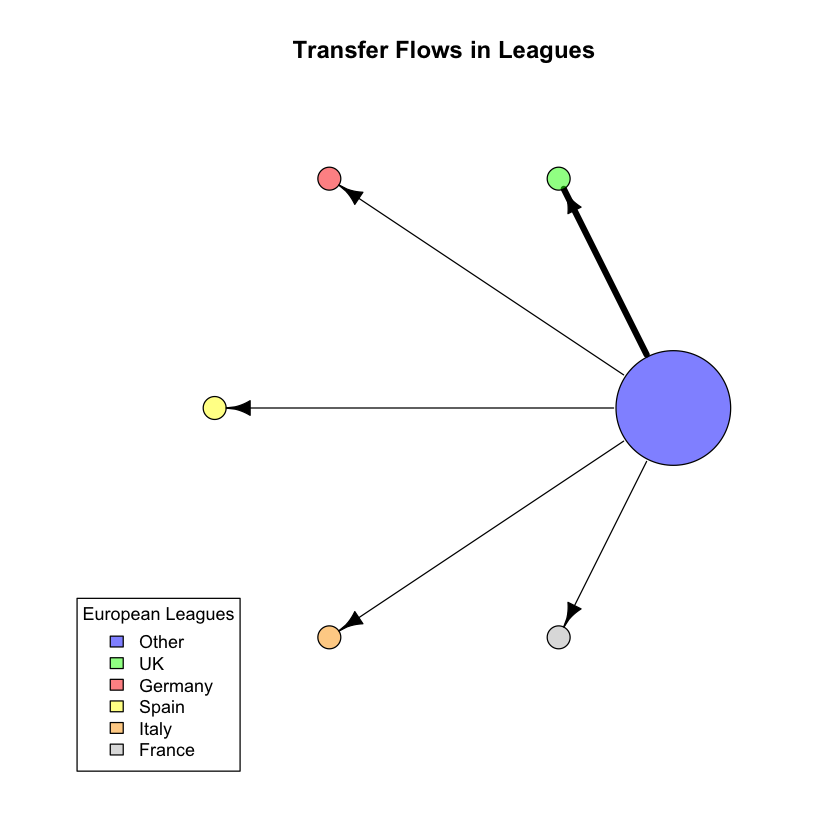

In [6]:
temp = data[(data$From_League != data$To_League) & data$From_League == 'Other',]

plotnetworksLEAGUES(temp)

In [90]:
png('/Users/gautamborgohain/Desktop/flows_in.png', width = 1200, height = 900, res = 100)
temp = data[(data$From_League != data$To_League) & data$From_League == 'Other',]

plotnetworksLEAGUES(temp)
dev.off()

Warning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement length

pdf 
  2

## While all have equivalent number of exports

Warning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement length

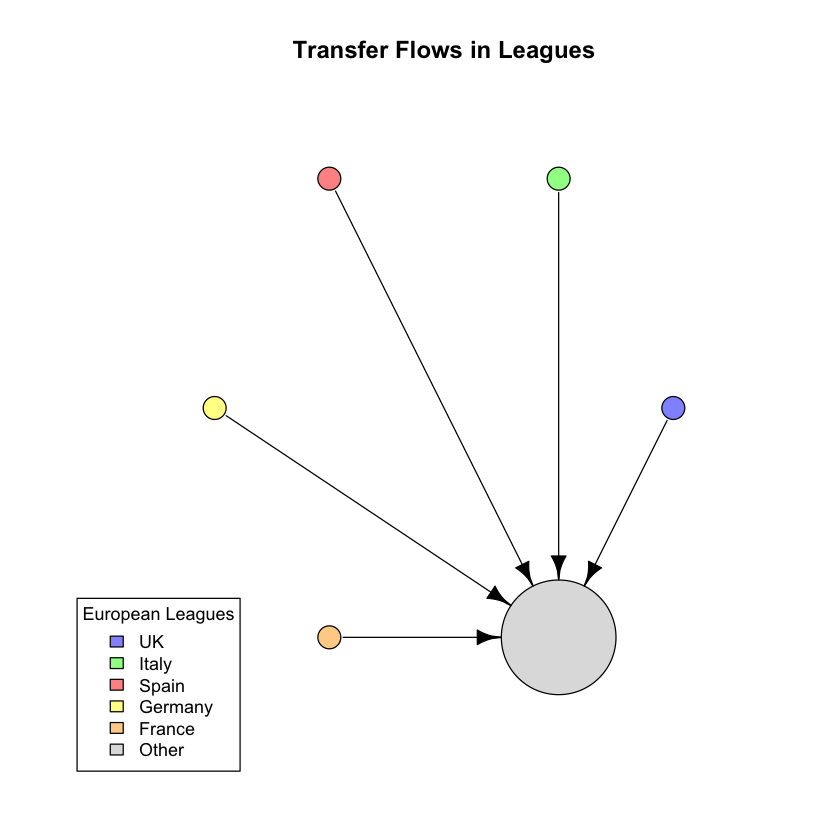

In [7]:
temp = data[(data$From_League != data$To_League) & data$To_League == 'Other',]

plotnetworksLEAGUES(temp)

In [94]:
png('/Users/gautamborgohain/Desktop/flows_out.png', width = 1200, height = 900, res = 100)
temp = data[(data$From_League != data$To_League) & data$To_League == 'Other',]

plotnetworksLEAGUES(temp)

dev.off()

Warning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement length

pdf 
  2

# Foreign Players

In [8]:
library(igraph)

radian.rescale <- function(x, start=0, direction=1) {
    c.rotate <- function(x) (x + start) %% (2 * pi) * direction
    c.rotate(scales::rescale(x, c(0, 2 * pi), range(x)))
    }
    

plotnetworks3 = function(df_paid){
    #Nodes
    df_paid = df_paid[complete.cases(df_paid[c('From_lon','From_lat','To_lon','To_lat','Trans_Value')]),]
    df_paid$Trans_Value = as.numeric(as.character(df_paid$Trans_Value))
    df_paid$To_Nat = as.character(df_paid$To_Nat)
    df_paid$Nationality = as.character(df_paid$Nationality)
    notforeignercolor = adjustcolor('black', alpha.f = 0.1)
    foreignercolor = adjustcolor('violet', alpha.f = 0.1)
    df_paid['Foreign'] = notforeignercolor
    df_paid$Foreign[df_paid$To_Nat != df_paid$Nationality] = foreignercolor
    nodes_1 = (subset(df_paid, select = c('From_Club','From_League','From_lat','From_lon')))
    nodes_2 = (subset(df_paid, select = c('To_Club','To_League','To_lat','To_lon')))
    names(nodes_1)[names(nodes_1) %in% c('From_Club','From_League','From_lat','From_lon')] = c('Club','League','lat','lon')
    names(nodes_2)[names(nodes_2) %in% c('To_Club','To_League','To_lat','To_lon')] = c('Club','League','lat','lon')
    nodes = rbind(nodes_1,nodes_2)
    nodes = nodes[!duplicated(nodes$Club),]
    #Edges
    edge = subset(df_paid,select = c('From_Club','To_Club','Trans_Value','Foreign'))
#     edge = 
    
    #Colors
    pal3 <- colorRampPalette(c("green","yellow","green","gray","red","blue"))
    colors <- adjustcolor(pal3(length(table(nodes$League))), alpha.f = 0.4)
    lookup = as.data.frame(table(nodes$League), columns = c('Var1','Freq'))
    lookup$Freq = colors
    nodes = merge(nodes,lookup,by.x = 'League',by.y ='Var1', all.x= TRUE)
    nodes = nodes[,c(2,1,3,4,5)] # reorder to put Club names first
    lay = layout.norm(as.matrix(nodes[,c('lon','lat')]))
    
    #iGraph prepare
    g = graph.data.frame(edge,nodes,directed= T)
    g = simplify(g)
    V(g)$color = nodes$Freq
    deg = degree(g)
    deg = sort(deg,decreasing = T)
#     min = min(deg[3])

    V(g)$size = degree(g)/4
    V(g)$label = V(g)$name

#     print(degree(g))
    n = nrow(nodes)    

    E(g)$arrow.size <- 0.5
    E(g)$width <- edge$Trans_Value/6000000
    E(g)$color = edge$Foreign

    lab.locs <- radian.rescale(x=1:n, direction=-1, start=0)
    edge_color_alpha = adjustcolor('black', alpha.f = 0.2)
    edge_color_TRANS = adjustcolor('black', alpha.f = 0.0)
    

#     V(g)$size = 5
    #Plot
    plot(g,
#          vertex.label = ifelse(degree(g) >= min(head(deg,4)), V(g)$label, NA),
#          edge.width = ifelse(E(g)$width>2, E(g)$width,NA),
         vertex.label = NA,
         vertex.label.dist=0.5,
         layout = lay,
#          edge.curved = .5,
#          edge.color = ifelse(edge$Foreign == 1,edge_color_alpha,edge_color_TRANS),
#          edge.color = edge_color_alpha,
        vertex.label.color= 'red',
        vertex.label.family = "sans",
#         vertex.label.degree=lab.locs,
        vertex.label.cex = 0.6)
    
    legend(x=-1.6, y=-0.83,legend = lookup$Var1,lookup$Freq,pt.cex=2, cex=.9,ncol = 1,
      title="European Leagues")
    
    title(df_paid[1,'window'])

}

Warning message:
In plotnetworks3(data): NAs introduced by coercionWarning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement lengthWarning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement length

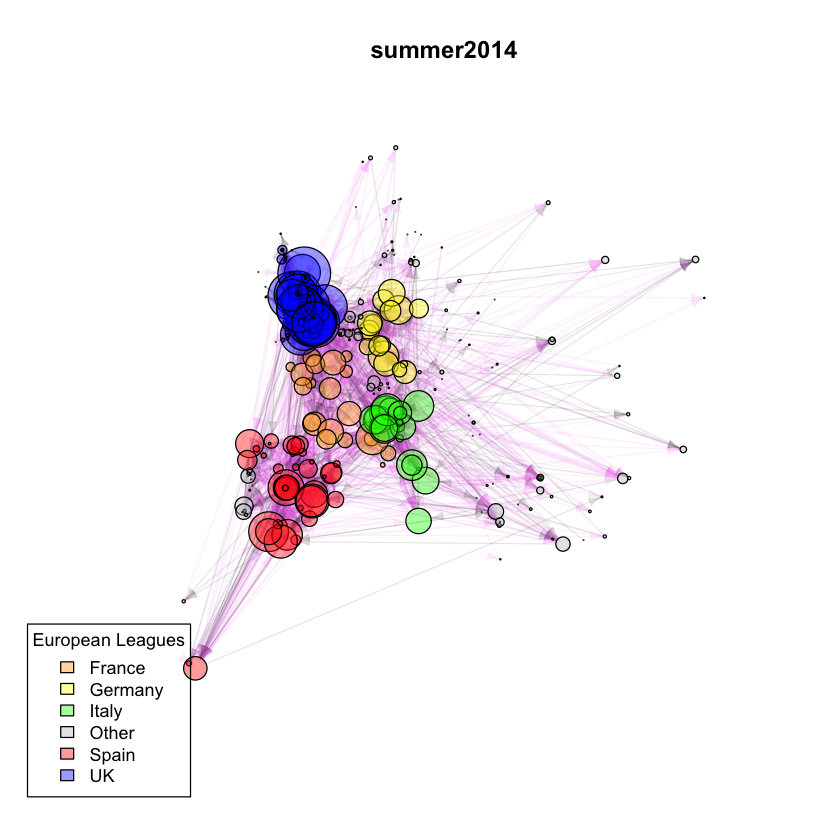

In [137]:
#All
# png('/Users/gautamborgohain/Desktop/foreign_all.png', width = 1200, height = 900, res = 100)
plotnetworks3(data)

# dev.off()

Warning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement lengthWarning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement length

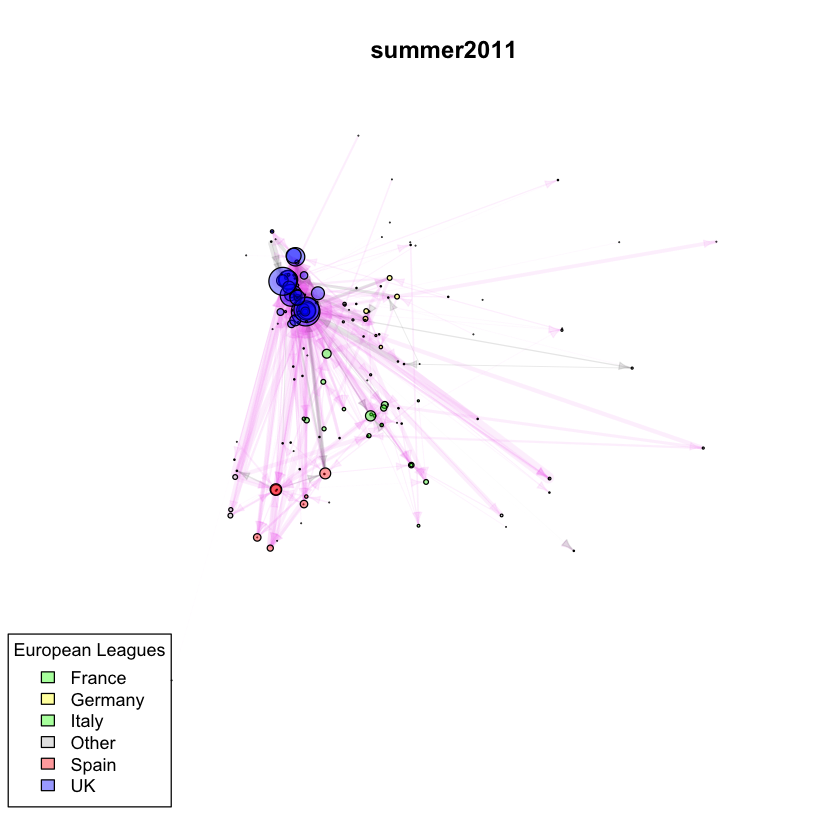

In [9]:
# paid
# png('/Users/gautamborgohain/Desktop/flows_out_paid.png', width = 1200, height = 900, res = 100)
plotnetworks3(data[data$ISPAID ==1,])
# dev.off()

Warning message:
In plotnetworks3(data[data$From_League == "UK" & data$To_League == : NAs introduced by coercionWarning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement lengthWarning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement length

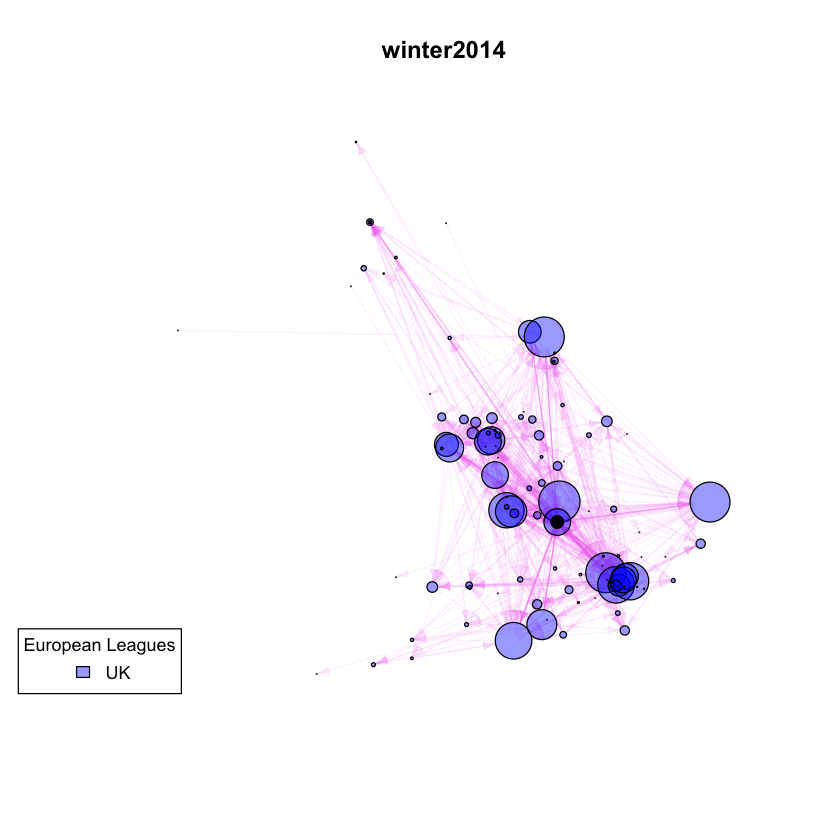

In [141]:
# png('/Users/gautamborgohain/Desktop/foreign_eng_paid.png', width = 1200, height = 900, res = 100)
plotnetworks3(data[data$From_League =='UK'& data$To_League == 'UK',])
# dev.off()

Warning message:
In plotnetworks3(data[data$From_League == "Italy" & data$To_League == : NAs introduced by coercionWarning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement lengthWarning message:
In eattrs[[name]][index] <- value: number of items to replace is not a multiple of replacement length

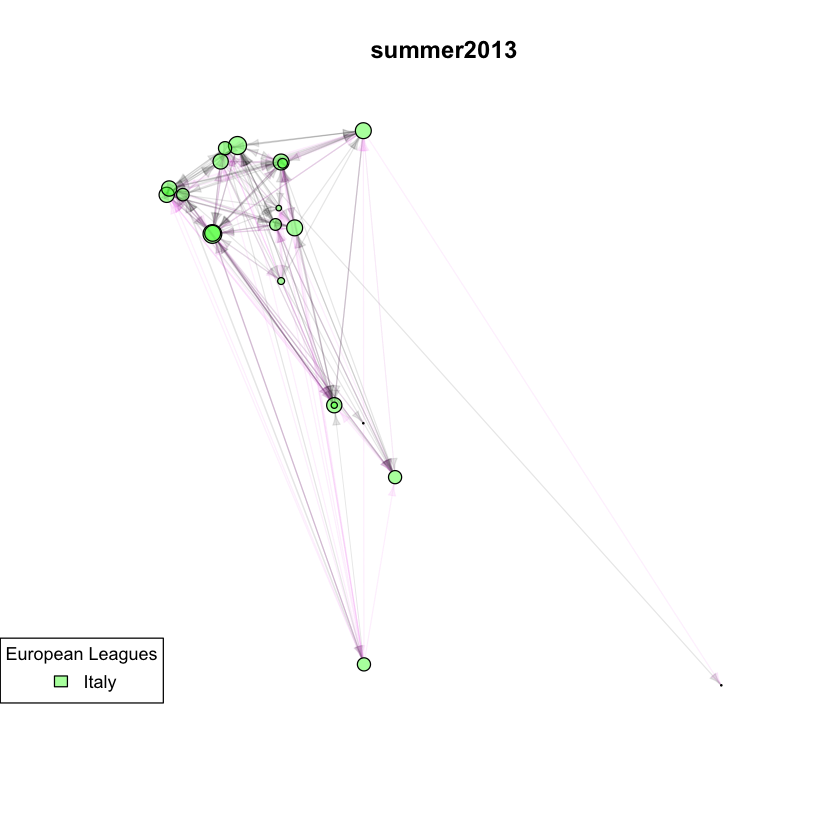

In [10]:
# png('/Users/gautamborgohain/Desktop/foreign_italy_paid.png', width = 1200, height = 900, res = 100)
plotnetworks3(data[data$From_League =='Italy'& data$To_League == 'Italy',])
# dev.off()